In [6]:
import numpy as np 
import pickle as pk 
import pyomo.environ as pyo

import model_MHE
from instance_data import data_fun
from importlib import reload 

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
import matplotlib
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt 

In [7]:
path = '/Users/ferlejarza/Desktop/Baldea/observability_estimation_perishbables/code/MPC_MHE_0916/'

with open(path+'/data_estimation2_0919/estimation_fb_x_past_true.pickle', 'rb') as handle:
    estimation_fb_x_past_true_instance = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_x_past.pickle', 'rb') as handle:
    estimation_fb_x_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_u_past.pickle', 'rb') as handle:
    estimation_fb_u_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_u_past_true.pickle', 'rb') as handle:
    estimation_fb_u_past_true_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/estimation_fb_demand_dict.pickle', 'rb') as handle:
    estimation_fb_demand_instance = pk.load(handle) 
    
with open(path+'/data_estimation2_0919/estimation_fb_x_past_true.pickle', 'rb') as handle:
    no_fb_inv_x_past_true_instance = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_x_past.pickle', 'rb') as handle:
    no_fb_inv_x_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_u_past.pickle', 'rb') as handle:
    no_fb_inv_u_past_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_u_past_true.pickle', 'rb') as handle:
    no_fb_inv_u_past_true_instance  = pk.load(handle)
    
with open(path+'/data_estimation2_0919/no_fb_inv_demand_dict.pickle', 'rb') as handle:
    no_fb_inv_demand_instance = pk.load(handle)    


In [8]:
estimation_fb_x_past_true_instance.keys() 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
norm_estimate_instance = {}
norm_nom_estimate_instance = {}

for instance in estimation_fb_x_past_true_instance.keys():

    x_past_true_est = estimation_fb_x_past_true_instance[instance]
    x_past_est = estimation_fb_x_past_instance[instance]
    
    x_past_true_nom = no_fb_inv_x_past_true_instance[instance]
    x_past_nom = no_fb_inv_x_past_instance[instance]

    norm_estimate = [] 
    norm_estimate_nom  = []
    for t in range(5,50): 
        x = [] 
        y = [] 
        z = [] 
        for q in range(1,31): 
            x.append(x_past_true_est['inventory'][('D1',q,1,t)])
            y.append(x_past_est['inventory'][('D1',q,1,t)]) 
            z.append(x_past_nom['inventory'][('D1',q,1,t)])

        norm_estimate.append(np.sqrt(np.linalg.norm(np.array(x)-np.array(y),2))/len(x))  
        norm_estimate_nom.append(np.sqrt(np.linalg.norm(np.array(x)-np.array(z),2))/len(x))  
        
    norm_estimate_instance[instance] = norm_estimate  
    norm_nom_estimate_instance[instance] = norm_estimate_nom  
    
norm_estimate_mean = [np.mean([norm_estimate_instance[i][t-5] for i in norm_estimate_instance.keys()]) for t in range(5,50)]
norm_estimate_std = [np.std([norm_estimate_instance[i][t-5] for i in norm_estimate_instance.keys()]) for t in range(5,50)]

norm_nom_estimate_mean = [np.mean([norm_nom_estimate_instance[i][t-5] for i in norm_nom_estimate_instance.keys()]) for t in range(5,50)]
norm_nom_estimate_std = [np.std([norm_nom_estimate_instance[i][t-5] for i in norm_nom_estimate_instance.keys()]) for t in range(5,50)]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


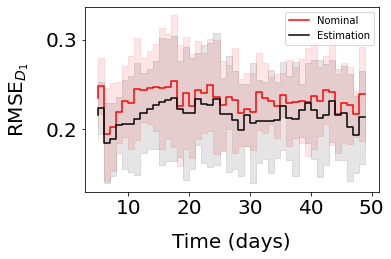

In [10]:

plt.step([i for i in range(5,50)], norm_nom_estimate_mean, color = 'red') 
plt.step([i for i in range(5,50)], norm_estimate_mean, color = 'k') 

plt.fill_between([i for i in range(5,50)], 
                 [j-1.96*norm_nom_estimate_std[i] for i,j in enumerate(norm_nom_estimate_mean)], 
                 [j+1.96*norm_nom_estimate_std[i] for i,j in enumerate(norm_nom_estimate_mean)], 
                 alpha = 0.1, step = "pre", color = 'red')
plt.fill_between([i for i in range(5,50)], 
                 [j-1.96*norm_estimate_std[i] for i,j in enumerate(norm_estimate_mean)], 
                 [j+1.96*norm_estimate_std[i] for i,j in enumerate(norm_estimate_mean)], 
                 alpha = 0.1, step = "pre", color = 'k')

plt.xticks([10,20,30,40,50])
plt.xlabel('Time (days)', labelpad = 15) 
plt.ylabel(r'RMSE$_{D_1}$', labelpad=15)
plt.legend([r'Nominal',
            r'Estimation'], fontsize = 10, ncol = 1, loc = 'upper right') ; 
plt.tight_layout() 
# plt.axvline(x=20,linestyle = '--',color = 'grey') 
plt.savefig('./figures/RMSE_estimate_vs_nominal_1_2_D1') 

In [11]:
norm_estimate_instance = {}
norm_nom_estimate_instance = {}

for instance in estimation_fb_x_past_true_instance.keys():

    x_past_true_est = estimation_fb_x_past_true_instance[instance]
    x_past_est = estimation_fb_x_past_instance[instance]
    
    x_past_true_nom = no_fb_inv_x_past_true_instance[instance]
    x_past_nom = no_fb_inv_x_past_instance[instance]

    norm_estimate = [] 
    norm_estimate_nom  = []
    for t in range(5,50): 
        x = [] 
        y = [] 
        z = [] 
        for q in range(1,31): 
            x.append(x_past_true_est['inventory'][('D1',q,1,t)])
            y.append(x_past_est['inventory'][('D1',q,1,t)]) 
            z.append(x_past_nom['inventory'][('D1',q,1,t)])

        
        norm_estimate.append(np.sqrt(np.linalg.norm(np.array(x)-np.array(y),2)/np.linalg.norm(np.array(x)-np.array(z),2)))
        
    norm_estimate_instance[instance] = norm_estimate  
    
norm_estimate_mean = [np.mean([norm_estimate_instance[i][t-5] for i in norm_estimate_instance.keys()]) for t in range(5,50)]
norm_estimate_std = [np.std([norm_estimate_instance[i][t-5] for i in norm_estimate_instance.keys()]) for t in range(5,50)]


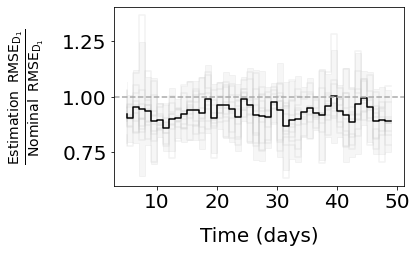

In [12]:

for i in estimation_fb_x_past_true_instance.keys(): 
    plt.step([i for i in range(5,50)], norm_estimate_instance[i],color='silver',alpha=0.2) 
    
ax = plt.step([i for i in range(5,50)], norm_estimate_mean, color = 'k') 
plt.fill_between([i for i in range(5,50)], 
                 [j-1.96*norm_estimate_std[i] for i,j in enumerate(norm_estimate_mean)], 
                 [j+1.96*norm_estimate_std[i] for i,j in enumerate(norm_estimate_mean)], 
                 color = 'darkgrey', alpha = 0.1, step = "pre")
plt.xticks([10,20,30,40,50])
axes = plt.gca()
plt.xlabel('Time (days)', labelpad = 15) 
plt.ylabel(r'$\frac{\rm{Estimation\;\; RMSE}_{D_1}}{Nominal \;\; RMSE_{D_1}}$', labelpad=15)
plt.tight_layout() 
plt.axhline(y=1,linestyle = '--',color = 'darkgrey') 
plt.savefig('./figures/RMSE_estimate_vs_nominal_2_D1') 
# plt.ylim((0.4125897336271165, 1.4036141623964197))